<a href="https://colab.research.google.com/github/hhdjwdabsxsx/Lung-Cancer-Detection-using-Transfer-Learning/blob/main/Lung_Cancer_Detection_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lung Cancer Detection using Transfer Learning**

**Transfer Learning**

In a convolutional neural network, the main task of the convolutional layers is to enhance the important features of an image. If a particular filter is used to identify the straight lines in an image then it will work for other images as well this is particularly what we do in transfer learning. There are models which are developed by researchers by regress hyperparameter tuning and training for weeks on millions of images belonging to 1000 different classes like imagenet dataset. A model that works well for one computer vision task proves to be good for others as well. Because of this reason, we leverage those trained convolutional layers parameters and tuned hyperparameter for our task to obtain higher accuracy.

**Importimg Libraries**

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.



*   Pandas: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

*   Numpy: Numpy arrays are very fast and can perform large computations in a very short time.

*   Matplotlib: This library is used to draw visualizations.

*   Sklearn: This module contains loibraries having pre-implemented fucntions to perform tasks from adata pre-processing to model development and evaluation.

*   OpenCV: This is an open-source library mainly focused on image processing and handling.

*   Tensorflow: This is an open-source library that is used in Machine Learning and Artificial Intelligence and provides a range of fucntions to achieve complex functionalities with single lines of code.








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn import metrics

import cv2
import gc
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

Now we will use the Kaggle API to download the dataset to the system. First, we will require the API key. To do this just navigate to the profile section in Kaggle and download the JSON file containing your details for API, after that just upload this to colab or locate in the local Jupyter environment.

In [ ]:
# Install Kaggle module
! pip install Kaggle

In [ ]:
# Upload API details json file to Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maulanarhodes","key":"f9d2ee8849ac44d8ebd04ae8bc30b3db"}'}

In [ ]:
# creating kaggle directory and moving the json files there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the Dataset
! kaggle datasets download -d subho117/lung-cancer-detection-using-transfer-learning

Dataset URL: https://www.kaggle.com/datasets/subho117/lung-cancer-detection-using-transfer-learning
License(s): MIT
100% 1.76G/1.76G [01:39<00:00, 19.8MB/s]
100% 1.76G/1.76G [01:39<00:00, 19.0MB/s]


**Now we unzip the dataset into the desired folder**

In [ ]:
! unzip lung-cancer-detection-using-transfer-learning.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: /content/data/lung_image_sets/lung_scc/lungscc1009.jpeg  
  inflating: /content/data/lung_

Dataset has been imported.

This dataset includes 5000 images for three classes of lung conditions:



*   Normal Class
*   Lung Adenocarcinomas
*   Lung Suamous Cell Carcinomas






**Data Visualization**

In this section, we will try to understand visualize some images which have been provided to us to build the classifier for rach class.

In [ ]:
path = '/content/data/lung_image_sets'
classes = os.listdir(path)
classes

['lung_scc', 'lung_n', 'lung_aca']

These are the three classes that we have here.

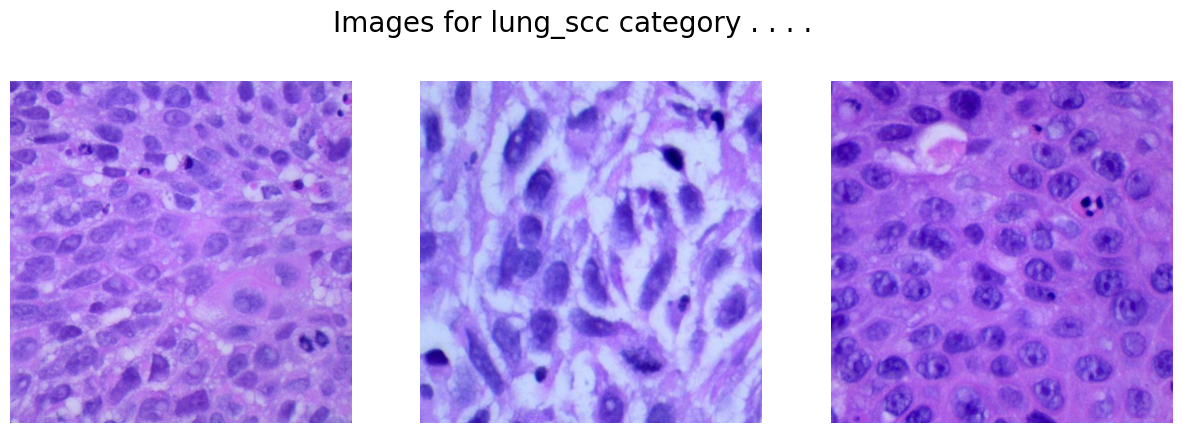

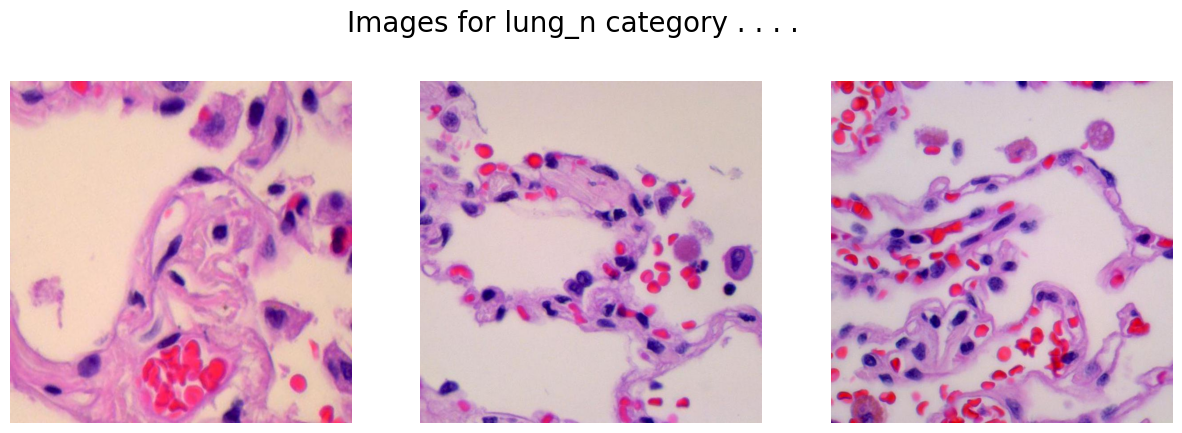

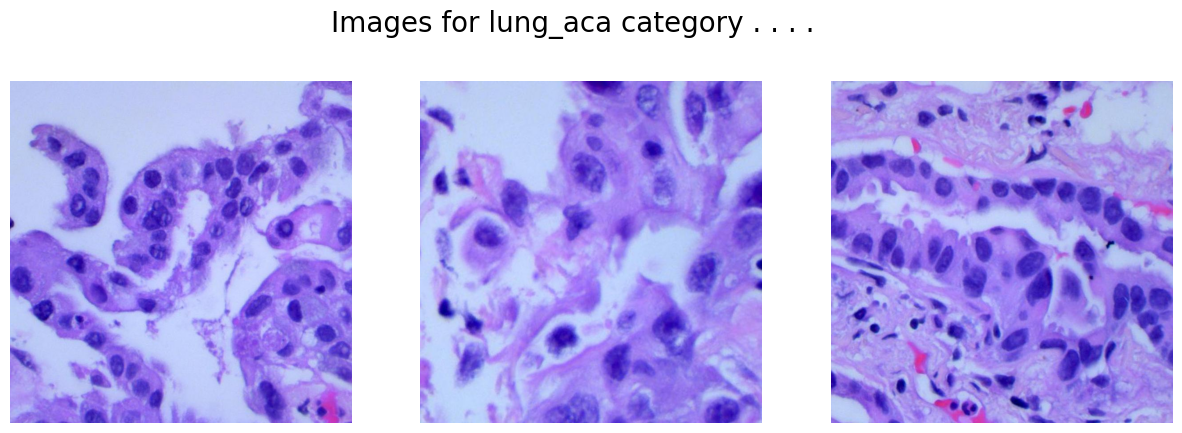

In [ ]:
path = '/content/data/lung_image_sets'

for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)

    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle(f'Images for {cat} category . . . .',
                 fontsize = 20)

    for i in range(3):
      k = np.random.randint(0, len(images))
      img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
      ax[i].imshow(img)
      ax[i].axis('off')
    plt.show()

The above output may vary if you will run this in your notebook because the code has been implemented in such a way that it will show different images every time you re-run the code.

**Data Preparation for Training**

Here we will convert the image into NumPy arrays of their pixels after resizing them because training a Deep Neural Network on large-size images is highly inefficient in terms of computational cost and time.

For this purpose, we will use the OpenCV library and Numpy libtaty of python to serve the purpose. Also, after all the images are converted into the desired format we will split them into training and testing validation data so that we camn evaluate the performance of our model.

In [ ]:
IMG_SIZE = 256
SPLIT = 0.2
EPOCHS = 10
BATCH_SIZE = 64

Some of the hyperparameters we can tweak from here for the whole notebook.

In [ ]:
X = []
Y = []

for i, cat in enumerate(classes):
  images = glob(f'{path}/{cat}/*.jpeg')

  for image in images:
    img = cv2.imread(image)

    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    Y.append(i)

X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values


One hot encoding will help us to train a model which can predict soft probabilities of an image being from each class with the highest probability for the class to which it really belongs.

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(
X, one_hot_encoded_Y, test_size = SPLIT, random_state = 2022)
print(X_train.shape, X_val.shape)

(12000, 256, 256, 3) (3000, 256, 256, 3)


In this step, we will achieve the shuffling of the data automatically because train_test_split function split the data randomly in the given ratio.

**Model Development**

We will use pre-trained weight for an inception netwrok which is trained on imagenet dataset. This dataset contains millions of images for around 1000 classes of images.

**Model Architecture**

We will implement a model using Functional API of Keras which will contain the following parts:


*   The base model is the Inception model in this case

*   The Flatten layer flattens the output of the base model's output.

*   Then we will have two fully connected layers followed by the output of the flattened layer.

*   We have included some BatchNormalization layers to enable stable and fast training and a Droput layer before the final layer to avoid any possibility of overfitting.

*   The final layer is the output layer which outputs soft probabilities for the three classes.











In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
  input_shape = (IMG_SIZE, IMG_SIZE, 3),
  weights = 'imagenet',
  include_top = False
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
len(pre_trained_model.layers)

311

This is how deep this model. This also justifies why this model is highly affective in extracting useful features from images which helps us to build classifiers.

The parameters of a model we import are already trained on millions of images and for weeks so, we do not need to train them again.

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

'Mixed7' is one of the layers in the inception network whose outputs we will use to build the classifier.

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
output_shape = last_layer.input[0].shape

print('last layer output shape:', output_shape)
last_output = last_layer.output


last layer output shape: (None, 14, 14, 192)


In [ ]:
x = layers.Flatten()(last_output)

x = layers.Dense(256,activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(3, activation='softmax')(x)

model = keras.Model(pre_trained_model.input, output)

While compiling a model we provide these three essential parameters:

*   optimizer: This is the method that helps to optimize the cost function by using gradient descent.

*   loss: The loss function by which we monitor whetehr the model is improving with training or not.

*   metrics: This helps to evaluate the model by predicting the traaining and the validation data.





In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

**Callback**

Callbacks are used to check whether the model is improving with each epoch or not. If not then what are the necessary steps to be taken like ReduceLROnPlateau decreases the learning rate further. Even then if model performance is not imrpoving then training will be stopped by EarlyStopping. We can also define some custom callbacks to stop training in between if the desired results have been obtained early.

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('val_accuracy') > 0.90:
      print('\n Validation accuracy has reached upto 90%\
      so. stopping further training.')
      self.modelstop_training = True

es = EarlyStopping(patience = 3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(monitor = 'val_loss',
                       patience = 2,
                       factor = 0.5,
                       verbose = 1)



Now we will train our model:

In [ ]:
history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose = 1,
          callbacks = [es, lr, myCallback()])


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 301ms/step - accuracy: 0.8137 - loss: 0.4846 - val_accuracy: 0.7170 - val_loss: 0.8871 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 190ms/step - accuracy: 0.9111 - loss: 0.2276 - val_accuracy: 0.7050 - val_loss: 1.3923 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.9243 - loss: 0.1918 - val_accuracy: 0.7620 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 167ms/step - accuracy: 0.9520 - loss: 0.1311 - val_accuracy: 0.8943 - val_loss: 0.2801 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 189ms/step - accuracy: 0.9497 - loss: 0.1235 - val_accuracy: 0.7330 - val_loss: 1.0595 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.9598 - loss: 0.1025
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 165ms/step - accuracy: 0.959

Let's visualize the training and validation accuracy with each epoch.

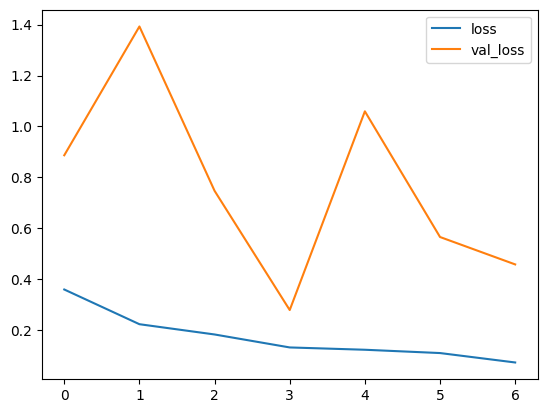

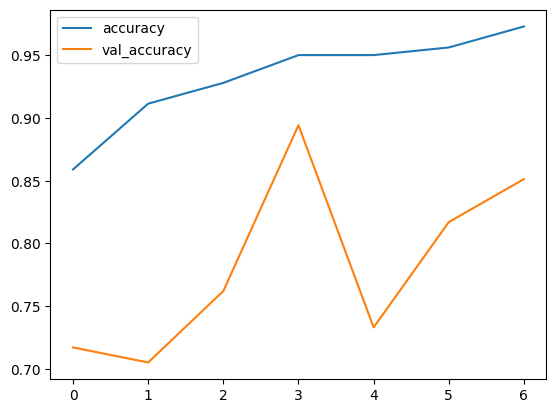

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

From the above graphs, we can certainly say that the model has not overfitted the training data as the difference between the training and validation accuracy is very low.

**Model Evaluation**

Now as we have our model ready let’s evaluate its performance on the validation data using different metrics. For this purpose, we will first predict the class for the validation data using this model and then compare the output with the true labels.




In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step


Let's draw the confusion metrics and classification report using the predicted labels and the true labels.

In [ ]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[981,   0,   6],
       [  1, 974,   2],
       [225,  83, 728]])

In [ ]:
print(metrics.classification_report(Y_val, Y_pred,
									target_names=classes))

              precision    recall  f1-score   support

    lung_scc       0.81      0.99      0.89       987
      lung_n       0.92      1.00      0.96       977
    lung_aca       0.99      0.70      0.82      1036

    accuracy                           0.89      3000
   macro avg       0.91      0.90      0.89      3000
weighted avg       0.91      0.89      0.89      3000



Save the model

In [ ]:
model.save('lung_cancer_detection_model.h5')

In [ ]:
model.save('lung_cancer_detection_model.keras')